In [6]:
import sys
import os
from importlib import reload
import numpy as np
import pylab as pl

sys.path.insert(0, '../src')
import deepgeo.dataset.preprocessor as prep
import deepgeo.utils.geofunctions as gf
import deepgeo.utils.filesystem as fs
import deepgeo.utils.visualization as vis

reload(prep)
reload(gf)
reload(fs)
reload(vis)

%matplotlib inline

In [7]:
DATA_DIR = "../data_real"
#raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-R6G5B4.tif")
raster_file = os.path.join(DATA_DIR, "Landsat8_225064_17072016_B1B7.tif")
vector_shp = os.path.join(DATA_DIR, "PRODES2016_225-64_REP.shp")
output_dir = os.path.join(DATA_DIR, "generated")
fs.mkdir(output_dir)
class_column = "agregClass"

In [8]:
preproc = prep.Preprocessor(raster_file, no_data=-9999)

In [9]:
result = preproc.compute_indexes({
    "ndvi": {
        "idx_b_red": 3,
        "idx_b_nir": 4
    },
    "evi": {
        "idx_b_blue":1,
        "idx_b_red": 3,
        "idx_b_nir": 4,
        "factor": 0.0001
    },
    "evi2": {
        "idx_b_red": 3,
        "idx_b_nir": 4
    }
})
print(result.shape)

(7805, 7646, 10)


(-0.5, 7645.5, 7804.5, -0.5)

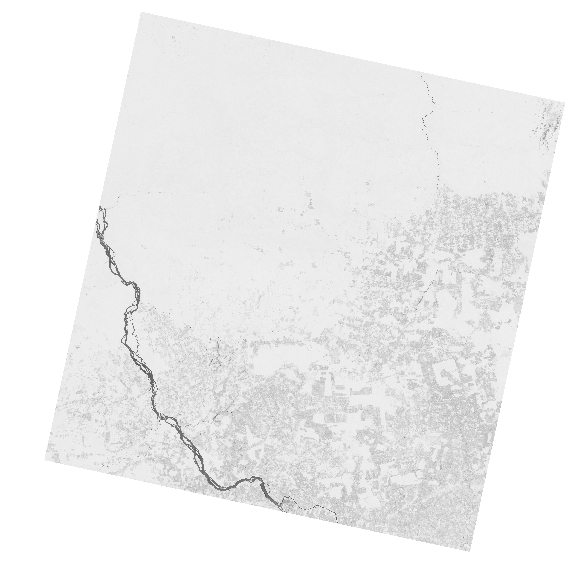

In [10]:
pl.figure(figsize=(10,10))
# pl.title('NDVI')
#raster_img = skimage.img_as_float(raster_img).astype(np.float32)
ndvi = preproc.get_index_band("ndvi")
#preproc.save_index_raster("ndvi", os.path.join(output_dir, "ndvi.tiff"))
pl.imshow(ndvi, cmap="gray")
pl.axis('off')
# vis.plot_rgb_img(ndvi) #TODO: How to plot when the image is not int, but float

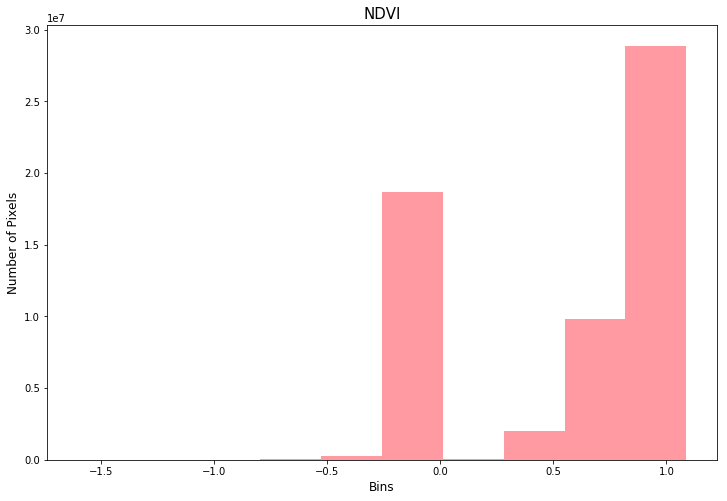

In [6]:
vis.plot_image_histogram(ndvi, title="NDVI")

(-0.5, 7645.5, 7804.5, -0.5)

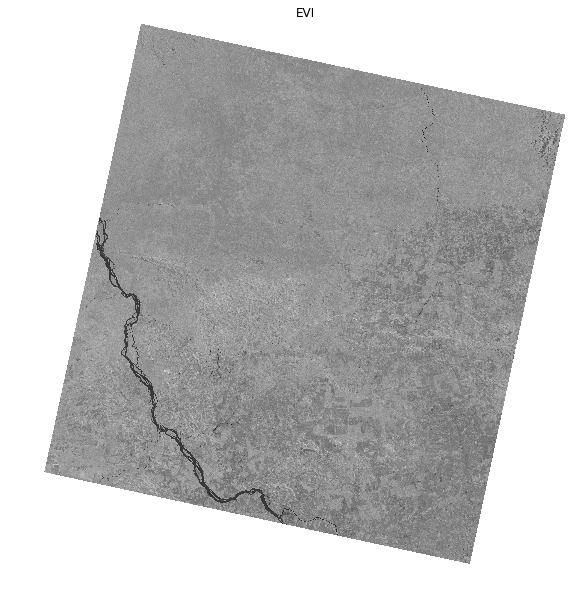

In [7]:
pl.figure(figsize=(10,10))
pl.title('EVI')
evi = preproc.get_index_band("evi")
#preproc.save_index_raster("evi", os.path.join(output_dir, "evi.tiff"))
pl.imshow(evi, cmap="gray")
pl.axis('off')

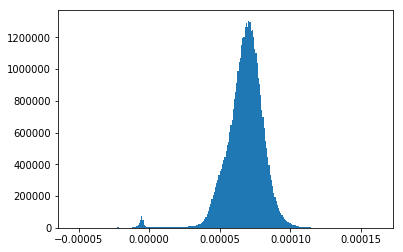

In [8]:
hist_evi = pl.hist(evi.ravel(), bins=256)

(-0.5, 7645.5, 7804.5, -0.5)

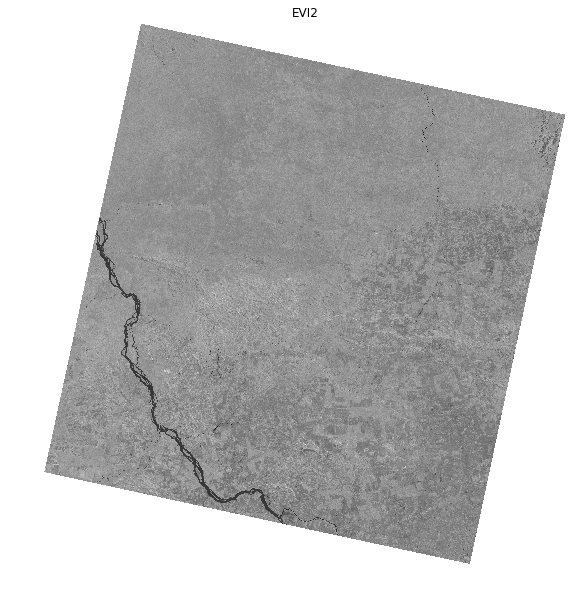

In [9]:
pl.figure(figsize=(10,10))
pl.title('EVI2')
evi2 = preproc.get_index_band("evi2")
#preproc.save_index_raster("evi2", os.path.join(output_dir, "evi2.tiff"))
pl.imshow(evi2, cmap="gray")
pl.axis('off')

[-5.364625522315414e-05 -4.954489241704072e-05 -4.921882697472084e-05 ...
 0.000159813075547368 0.00016188816030939576 --]


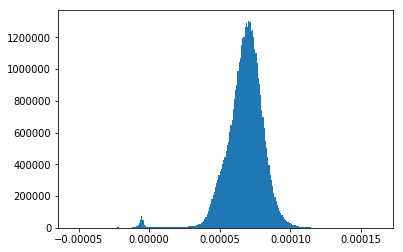

In [10]:
hist_evi2 = pl.hist(evi2.ravel(), bins=256)
print(np.unique(evi))

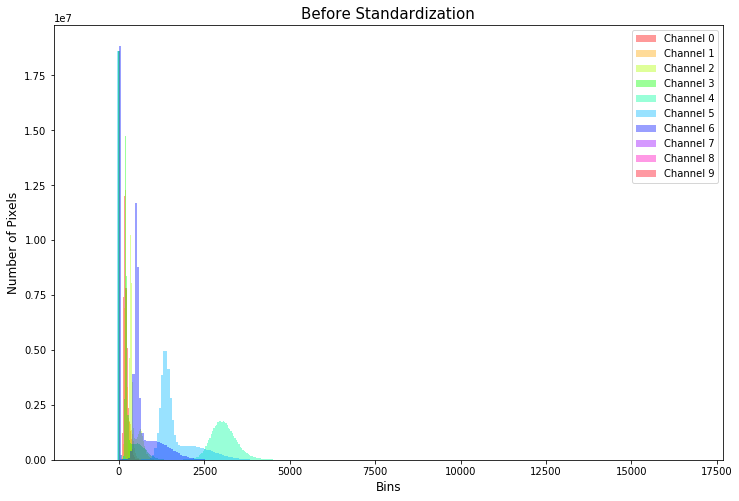

[-1024.0 -794.0 -789.0 ... 16767.0 16798.0 --]


In [11]:
#print(np.unique(evi))
raster_ = preproc.get_raster_stacked_raster()
vis.plot_image_histogram(raster_, title = "Before Standardization")
# print(np.unique(raster_))

In [12]:
raster = preproc.standardize_image("median_std")

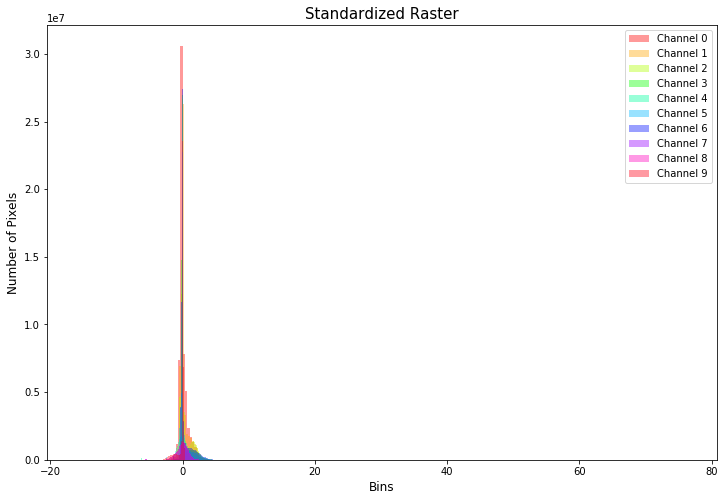

In [13]:
vis.plot_image_histogram(raster, title="Standardized Raster")

In [14]:
#preproc.save_stacked_raster(os.path.join(output_dir, "new_raster.tiff"))